# **Laboratorio 5: Codigos de las señales EEG con Ultracortex Mark IV**

## 1. Importar Librerias

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 2. Cargar el archivo

Usaremos la libreria de pandas para esto con el archivo .csv puesto que no queremos perder la información de cabecera como los nombres de columnas (canales del EEG) y nos damos cuenta que las separaciones no estan bien definidas por lo que solo nos estaba leyendo como una unica linea. Sin embargo realizamos las separaciones obteniendo un total de 180280 filas (muestras en el tiempo).

In [ ]:
# Cargamos datos desde archivo CSV
path = r"F:\IB PUCP - UPCH\7mo Ciclo\Introducción a Señales Biomedicas\Laboratorios\Lab5 - Adquisicion de Señal EEG\UltracortexEEG.txt"
df = pd.read_csv(path, sep=",", comment="%", engine="python") # Modificamos el separador a tabulador manualmente con sep="\t"
# header=None para que no tome la primera fila como cabecera

## 3. Extracción de datos

Extraemos la data principal de nuestro dataframe, por ejemplo frecuencia de muestreo, numero de columnas (canales), numero de filas (muestras en el tiempo), nombre de las columnas y data en general.

In [ ]:
# Inspeccionamos los datos
print(df.info())
print(df.columns)
n_rows, n_cols = df.shape

# Imprimimos el tamaño del DataFrame
print(f"Archivo leído: {n_rows} filas x {n_cols} columnas")

# Imprimimos los nombres de las columnas
print(df.columns.tolist())

# Obtenemos la frecuencia de muestreo de Timestamp
t = df[" Timestamp"].values
dt = np.diff(t).mean()
fs = 1.0 / dt
print("La frecuencia de muestreo exacta es: ", fs)
# Sin embargo, en el archivo .txt a traves de comentarios se nos aclara una frecuencia de muestreo de 250 Hz
fs = 250.0  # Hz

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180227 entries, 0 to 180226
Data columns (total 25 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Sample Index              180227 non-null  float64
 1    EXG Channel 0            180227 non-null  float64
 2    EXG Channel 1            180227 non-null  float64
 3    EXG Channel 2            180227 non-null  float64
 4    EXG Channel 3            180227 non-null  float64
 5    EXG Channel 4            180227 non-null  float64
 6    EXG Channel 5            180227 non-null  float64
 7    EXG Channel 6            180227 non-null  float64
 8    EXG Channel 7            180227 non-null  float64
 9    Accel Channel 0          180227 non-null  float64
 10   Accel Channel 1          180227 non-null  float64
 11   Accel Channel 2          180227 non-null  float64
 12   Not Used                 180227 non-null  float64
 13   Digital Channel 0 (D11)  180227 non-null  f

## 4. Definición del eje temporal

In [ ]:
# Extraemos solo los canales EEG
eeg_cols = [f" EXG Channel {i}" for i in range(8)]
eeg_data = df[eeg_cols].to_numpy()

# Muestra ahora el numero de columnas de eeg_data que son 8 pues la placa cython tiene 8 canales EEG
print("Forma del EEG:", eeg_data.shape) # (n_samples, n_channels)

# Definimos el eje temporal
n_samples = eeg_data.shape[0] # Extrae el numero de filas de eeg_data
t = np.arange(n_samples) / fs  # eje temporal en segundos


Forma del EEG: (180227, 8)


## 5. Visualización de las gráficas

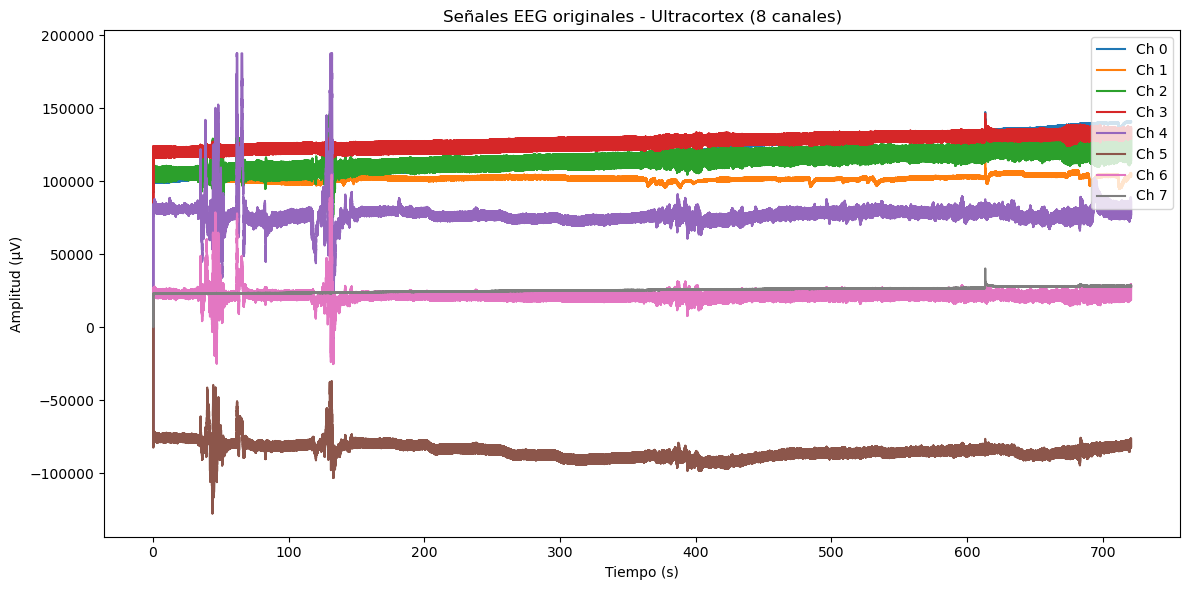

In [ ]:
plt.figure(figsize=(12, 6))
for i in range(8):
    plt.plot(t, eeg_data[:, i], label=f"Ch {i}")

plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud (µV)")
plt.title("Señales EEG originales - Ultracortex (8 canales)")
plt.legend(loc="upper right")
plt.tight_layout()
plt.show()